# <span style="color:red">**exercise 2**</span>
![Python logo](./python_logo.gif)
---

### submited by:
- Name: Shahar Asher
- Id: 209305408
- Email adress: shaharas@edu.hac.ac.il
- Date: 12/04/2024

### Operation system: Windows 11
### Python version: 3.11.5 (Using anaconda)
### IDE: Visual Studio Code
### External libraries: numpy, matplotlib
---

In [86]:
# imports
import struct
import matplotlib.pyplot as plt
import numpy as np

## Q.1: Extracting values from a binary file
- The function __dump_array_file__ reads the binary file and
extracts the values using __struct.unpack__ .
It prints the extracted values in a readable format.

In [87]:
def dump_array_file(file_name:str)->tuple[tuple[float, float, int], tuple[float, float, int]]:
    """
    Reads a binary file containing an array of structures and extracts the values.

    Args:
        file_name (str): The path to the binary file.

    Returns:
        tuple: A tuple containing two tuples. Each inner tuple contains three values extracted from the binary file:
               - First value: float
               - Second value: float
               - Third value: int

    Example:
        >>> dump_array_file("./f32_f32_i16.bin")
        ((1.0, 2.0, 3), (4.0, 5.0, 6))
    """
    re_1:tuple[float, float, int] = ()
    re_2:tuple[float, float, int] = ()
    with open(file_name, "rb") as file:
        bdata:bytes = file.read()
        
        re_1:tuple[float, float, int] = struct.unpack("ffh", bdata[:10])
        re_2:tuple[float, float, int] = struct.unpack("ffh", bdata[10:])
        
    return (re_1, re_2)

In [88]:
cont:tuple[tuple[float, float, int], tuple[float, float, int]] = dump_array_file("./f32_f32_i16.bin")
print(f'file content:\n{cont[0]}\n{cont[1]}')

file content:
(-0.5, 3.0, 5)
(5.0, 4.25, 45)


## Q.2: Displaying the image
- The function __show_img__ reads the binary file containing the image data.
- It unpacks the binary data into a list of floating-point numbers.
- Then, it converts the list into a NumPy array and reshapes it to the original image shape.
- Finally, it displays the image using Matplotlib.

In [89]:
def show_img(file_name:str)->None:
    """
    Reads a binary file containing image data and displays the image.

    Args:
        file_name (str): The path to the binary file.

    Returns:
        None

    Example:
        >>> show_img("./image.bin")
        [Image displayed]
    """
    # Open the binary file
    with open(file_name, "rb") as file:
        # read the first line of the file - for knowing the row & col
        bdata:bytes = file.readline()
        row:int = struct.unpack("b", bdata[1:2])[0]
        col:int = struct.unpack("b", bdata[3:4])[0]

        # Read the rest of the file containing image data
        bdata:bytes = file.read()

        # Convert binary data into a list of lists representing the image
        data:list = []
        for i in range(0, row):
            dataTemp:list = []
            for j in range(0, col):
                dataTemp.append(bdata[i*10+j])
            data.append(dataTemp)

        # Convert the list to a numpy array
        img_np:np.ndarray = np.array(data)

        # Display the image
        plt.imshow(img_np, cmap="gray")
        plt.show()

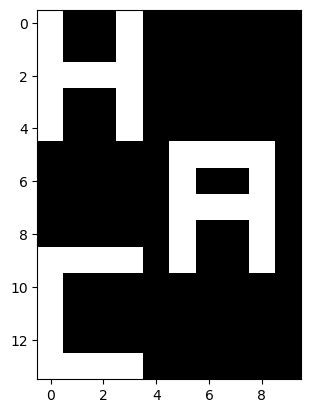

In [90]:
show_img("./image.bin")